# Data Analysis on Amazon Movie & TV Reviews [3830ICT Assignment 1]

# 1. Data Preperation & Preprocessing

## 1.1. Read the Dataset

Import the relevant modules to be used later on:

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import gzip

The dataset is in .json.gz format (GZipped JavaScript Object Notation)

Read the dataset:

In [2]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Movies_and_TV_5.json.gz')

This dataset contains product reviews and metadata from Amazon, specific to the Movies & TV category.

## 1.2. View the Dataset (before cleaning)

The following methods allow us to describe and view the dataset before cleaning.

View the head of the dataset:

In [3]:
df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,ADZPIG9QOCDG5,0005019281,"Alice L. Larson ""alice-loves-books""","[0, 0]",This is a charming version of the classic Dick...,4.0,good version of a classic,1203984000,"02 26, 2008"
1,A35947ZP82G7JH,0005019281,Amarah Strack,"[0, 0]",It was good but not as emotionally moving as t...,3.0,Good but not as moving,1388361600,"12 30, 2013"
2,A3UORV8A9D5L2E,0005019281,Amazon Customer,"[0, 0]","Don't get me wrong, Winkler is a wonderful cha...",3.0,Winkler's Performance was ok at best!,1388361600,"12 30, 2013"
3,A1VKW06X1O2X7V,0005019281,"Amazon Customer ""Softmill""","[0, 0]",Henry Winkler is very good in this twist on th...,5.0,It's an enjoyable twist on the classic story,1202860800,"02 13, 2008"
4,A3R27T4HADWFFJ,0005019281,BABE,"[0, 0]",This is one of the best Scrooge movies out. H...,4.0,Best Scrooge yet,1387670400,"12 22, 2013"
5,A2L0G56BNOTX6S,0005019281,barbara whapeles,"[0, 0]",This has been a favorite movie of mine for a l...,5.0,Dickens updated.,1383696000,"11 6, 2013"
6,A5NYUBEKXFLX5,0005019281,"B. Babb ""kites0852""","[1, 1]",This is the American adaptation of the Charles...,5.0,A MUST-HAVE FOR ANY VIDEO CHRISTMAS COLLECTION!!,1230595200,"12 30, 2008"
7,A2DJ8B8GE4V2VD,0005019281,Berl S. Meyer,"[0, 0]",Glad that this american classic came out on dv...,5.0,An American Christmas Carol,1260835200,"12 15, 2009"
8,AWF2S3UNW9UA0,0005019281,beth holman,"[0, 0]",A good Christmas carol dhenry winkler one duri...,5.0,an american christmas carol,1386201600,"12 5, 2013"
9,A3O4UUT83DG3OU,0005019281,Bettylou Sperling,"[0, 0]",How a bitter old man comes to know the true me...,5.0,Fantastic!,1379721600,"09 21, 2013"


View the tail of the dataset:

In [4]:
df.tail(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
1697523,APO10VQE3MAKE,B00LT1JHLW,D. Atkinson,"[2, 9]",Well it is finally coming to fruition! Batman...,5.0,Finally!,1405900800,"07 21, 2014"
1697524,A3PPYOJBMFBP6U,B00LT1JHLW,GranO,"[3, 10]",I would also like to see the original 20th Cen...,4.0,Please Include The 'Batman In Color' Bumper Wh...,1405728000,"07 19, 2014"
1697525,A3UHLJGZ2E84A5,B00LT1JHLW,"Jordan Lund ""Jordan""","[4, 21]","Seems expensive, but it is for 120 episodes. T...",3.0,$1.57 per episode. $3.14 per hour.,1405728000,"07 19, 2014"
1697526,A22OB0DIJ5FO0G,B00LT1JHLW,"Mazkoor Shariff ""dackjawson""","[2, 12]","Looking very much forward to this release, but...",4.0,"Worth the wait, but worth the asking price, too?",1405728000,"07 19, 2014"
1697527,A2CA2Q6JS6CQAE,B00LT1JHLW,"Michael Harris ""Michael Harris""","[10, 14]",Finally to be released on DVD and Blu-Ray Nove...,5.0,Finally on dvd and blu-ray The Batman TV Series,1405987200,"07 22, 2014"
1697528,AV657BUYHHXZ2,B00LT1JHLW,"Mike Rules ""Mike""","[1, 14]",wow $269.99 for the entire series on Blu Ray??...,1.0,Way to Expensive!! WB = GREED,1406073600,"07 23, 2014"
1697529,A17W587EH23J0Q,B00LT1JHLW,"Ron2900 ""Ron""","[32, 48]","Finally, the holy grail of tv-on-dvd boxsets i...",5.0,"HOLY BAT-BOXSET, BATMAN... I never thought thi...",1405641600,"07 18, 2014"
1697530,A3DE438TF1A958,B00LT1JHLW,thomas henry,"[3, 10]",Could this be a true or I'm i dreaming batman ...,5.0,prayers have been answered because batman 60s ...,1405728000,"07 19, 2014"
1697531,A2RWCXDMANY0LW,B00LT1JHLW,wheev,"[0, 4]",I've been a fan of the series since I was a yo...,5.0,can't Wait!,1405987200,"07 22, 2014"
1697532,A3ROPC55BE2OM9,B00LT1JHLW,WingLT,"[11, 23]",People seriously need to wake up and realize t...,5.0,The Price is Insane? People Really Need to Wak...,1405728000,"07 19, 2014"


View the shape (number of columns, rows) of the dataset:

In [5]:
df.shape

(1697533, 9)

View the column names (attributes) of the dataset:

In [7]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

The .info() method provides important information about the dataset, such as the number of rows, number of columns, number of non-missing values in each column, and the data type stored in each column:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1697533 entries, 0 to 1697532
Data columns (total 9 columns):
reviewerID        object
asin              object
reviewerName      object
helpful           object
reviewText        object
overall           float64
summary           object
unixReviewTime    int64
reviewTime        object
dtypes: float64(1), int64(1), object(7)
memory usage: 129.5+ MB


The .describe() method calculates summary statistics of the data:

In [9]:
df.describe()

,overall,unixReviewTime
count,1.697533e+06,1.697533e+06
mean,4.110648e+00,1.262422e+09
std,1.197615e+00,1.289277e+08
min,1.000000e+00,8.793792e+08
25%,4.000000e+00,1.164413e+09
50%,5.000000e+00,1.307491e+09
75%,5.000000e+00,1.373242e+09
max,5.000000e+00,1.406074e+09


Most reviews are high.

Visualise the number of good/bad ratings:

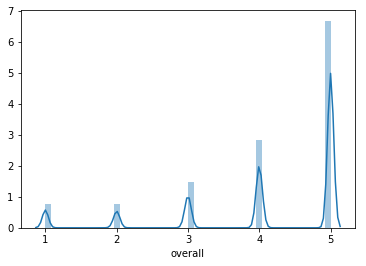

In [12]:
sns.distplot(df['overall'])

## 1.3. Cleaning 

### 1.3.1. Formatting

Convert data to a standard format for easy manipulation.

Convert the reviewTime column to datetime type:

In [13]:
df['reviewTime_convert'] = pd.to_datetime(df.reviewTime)

Check if it worked:

In [14]:
df[['reviewTime','reviewTime_convert']].head(5)

,reviewTime,reviewTime_convert
0,"02 26, 2008",2008-02-26
1,"12 30, 2013",2013-12-30
2,"12 30, 2013",2013-12-30
3,"02 13, 2008",2008-02-13
4,"12 22, 2013",2013-12-22


The date is in US format ie. YYYY-MM-DD.

Similarly unixReviewTime can also be converted to dateTime type:

However unixReviewTime will be droped later as it is redundant, so it will not be converted.

Change overall to integer type:

In [15]:
df['overall'] = df['overall'].astype(int)

Check if it worked:

In [16]:
df['overall'].head(5)

0    4
1    3
2    3
3    5
4    4
Name: overall, dtype: int32

### 1.3.2. Missing Data

Check for missing data:

In [17]:
df.isnull().sum()

reviewerID               0
asin                     0
reviewerName          6076
helpful                  0
reviewText               0
overall                  0
summary                  0
unixReviewTime           0
reviewTime               0
reviewTime_convert       0
dtype: int64

There are 6076 reviews with missing reviewer names.

Fill the missing data with the string 'Unknown':

In [18]:
df.fillna('Unknown', inplace=True)

Check if it worked:

In [19]:
df.isnull().sum()

reviewerID            0
asin                  0
reviewerName          0
helpful               0
reviewText            0
overall               0
summary               0
unixReviewTime        0
reviewTime            0
reviewTime_convert    0
dtype: int64

There is now no cells with missing data.

### 1.3.3. Invalid Data

Check for invalid data.

Check that all values in overall are between 0-5:

In [20]:
df.loc[(df['overall']<0) | (df['overall']>5)]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewTime_convert


Check that all dates in reviewTime are between May 1996 - July 2014:

In [21]:
df.loc[(df['reviewTime_convert']<'1996-05-01') | (df['reviewTime_convert']>'2014-07-31')]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewTime_convert


There is no invalid data.

### 1.3.4. Irrelevant Data 

Remove irrelevant data.

Remove unixReviewTime column as it has the same meaning as the reviewTime attribute in this dataset:

In [22]:
del df['unixReviewTime']

### 1.3.5. Inconsistent data

Two different reviewers should not have the same ID.

In [26]:
group = df.groupby('reviewerID')['reviewerName'].unique()
group[group.apply(lambda x: len(x)>1)].head(10)

reviewerID
A100RFQHFO005W                [artifice "artifice", Unknown]
A100WFKYVRPVX7                         [Michael C., Unknown]
A10175AMUHOQC4                          [stoneyloc, Unknown]
A101L3HXTII0I5                         [A. Elliott, Unknown]
A102B8D74H64TO                         ["malachix", Unknown]
A106016KSI0YQ                         [Jay Dickson, Unknown]
A106YXO3EHVD3J    [DR SHOCK "MR. KIA RETURNS! ;-b", Unknown]
A109KUJ2SX289                      [Michael Wilson, Unknown]
A10AFVU66A79Y1         [Amazon Customer "Flo", Renita "Flo"]
A10BT85QEKBZNZ                             [SMS CA, Unknown]
Name: reviewerName, dtype: object

### 1.3.6. Check

In [28]:
df.head(20)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,reviewTime,reviewTime_convert
0,ADZPIG9QOCDG5,0005019281,"Alice L. Larson ""alice-loves-books""","[0, 0]",This is a charming version of the classic Dick...,4,good version of a classic,"02 26, 2008",2008-02-26
1,A35947ZP82G7JH,0005019281,Amarah Strack,"[0, 0]",It was good but not as emotionally moving as t...,3,Good but not as moving,"12 30, 2013",2013-12-30
2,A3UORV8A9D5L2E,0005019281,Amazon Customer,"[0, 0]","Don't get me wrong, Winkler is a wonderful cha...",3,Winkler's Performance was ok at best!,"12 30, 2013",2013-12-30
3,A1VKW06X1O2X7V,0005019281,"Amazon Customer ""Softmill""","[0, 0]",Henry Winkler is very good in this twist on th...,5,It's an enjoyable twist on the classic story,"02 13, 2008",2008-02-13
4,A3R27T4HADWFFJ,0005019281,BABE,"[0, 0]",This is one of the best Scrooge movies out. H...,4,Best Scrooge yet,"12 22, 2013",2013-12-22
5,A2L0G56BNOTX6S,0005019281,barbara whapeles,"[0, 0]",This has been a favorite movie of mine for a l...,5,Dickens updated.,"11 6, 2013",2013-11-06
6,A5NYUBEKXFLX5,0005019281,"B. Babb ""kites0852""","[1, 1]",This is the American adaptation of the Charles...,5,A MUST-HAVE FOR ANY VIDEO CHRISTMAS COLLECTION!!,"12 30, 2008",2008-12-30
7,A2DJ8B8GE4V2VD,0005019281,Berl S. Meyer,"[0, 0]",Glad that this american classic came out on dv...,5,An American Christmas Carol,"12 15, 2009",2009-12-15
8,AWF2S3UNW9UA0,0005019281,beth holman,"[0, 0]",A good Christmas carol dhenry winkler one duri...,5,an american christmas carol,"12 5, 2013",2013-12-05
9,A3O4UUT83DG3OU,0005019281,Bettylou Sperling,"[0, 0]",How a bitter old man comes to know the true me...,5,Fantastic!,"09 21, 2013",2013-09-21


## 1.4. Dimensionality Reduction